##Topic: Detecting Phishing website
Group Members: TE COMPS B<br>
Shreya Kakade - 14 <br>
Apeksha Kamath - 15<br>
Atharva Kulkarni - 26

#Importing dataset

In [ ]:
from google.colab import drive  #importing drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Basic information about dataset

In [ ]:
import pandas as pd #Importing basic libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
data = pd.read_csv('/content/drive/MyDrive/DWM/dataset_phishing.csv') #importing db from drive
pd.DataFrame(data)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [ ]:
data.shape  #count of row and column resp

(11430, 89)

In [ ]:
list(data.columns) #list of columns

['url',
 'length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_hyphens',
 'nb_at',
 'nb_qm',
 'nb_and',
 'nb_or',
 'nb_eq',
 'nb_underscore',
 'nb_tilde',
 'nb_percent',
 'nb_slash',
 'nb_star',
 'nb_colon',
 'nb_comma',
 'nb_semicolumn',
 'nb_dollar',
 'nb_space',
 'nb_www',
 'nb_com',
 'nb_dslash',
 'http_in_path',
 'https_token',
 'ratio_digits_url',
 'ratio_digits_host',
 'punycode',
 'port',
 'tld_in_path',
 'tld_in_subdomain',
 'abnormal_subdomain',
 'nb_subdomains',
 'prefix_suffix',
 'random_domain',
 'shortening_service',
 'path_extension',
 'nb_redirection',
 'nb_external_redirection',
 'length_words_raw',
 'char_repeat',
 'shortest_words_raw',
 'shortest_word_host',
 'shortest_word_path',
 'longest_words_raw',
 'longest_word_host',
 'longest_word_path',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path',
 'phish_hints',
 'domain_in_brand',
 'brand_in_subdomain',
 'brand_in_path',
 'suspecious_tld',
 'statistical_report',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'rati

In [ ]:
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

#Data preprocessing

In [ ]:
data.isnull().sum() #no null values present in db

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

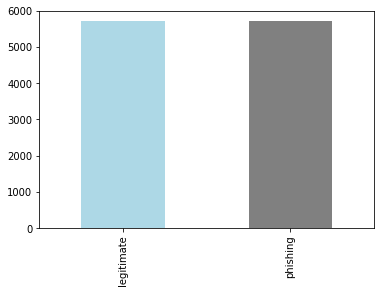

In [ ]:
data.status.value_counts().plot(kind="bar", color=["lightblue", "gray"])  #dataset is balanced
plt.show()

In [ ]:
data.status.value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

Categorical encoding

In [ ]:
data = data.replace({'status': {'legitimate': 1, 'phishing': 0}})
data.head(5)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,1
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,0
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,0
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,1
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,1


# Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.feature_selection import mutual_info_classif

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB as GaussianNBClassifier
from sklearn.linear_model import Lasso

In [ ]:
def accuracyKnn(X_train,X_test,y_train,y_test):
    classifierknn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    classifierknn.fit(X_train,y_train)
    y_predknn = classifierknn.predict(X_test)
    accuracy = accuracy_score(y_test, y_predknn)
    print("KNN: {}".format(accuracy))
    return accuracy

def accuracyDecision(X_train,X_test,y_train,y_test):
    classifierdt = DecisionTreeClassifier(criterion='entropy', random_state=0)
    classifierdt.fit(X_train,y_train)
    y_preddt = classifierdt.predict(X_test)
    accuracy1 = accuracy_score(y_test, y_preddt)
    print("DT: {}".format(accuracy1))
    return accuracy1

def accuracyRF(X_train,X_test,y_train,y_test):
    classifierrf=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    classifierrf.fit(X_train,y_train)
    y_predrf = classifierrf.predict(X_test)
    accuracy3 = accuracy_score(y_test, y_predrf)
    print("RF: {}".format(accuracy3))
    return accuracy3

def accuracyNB(X_train,X_test,y_train,y_test):
    classifiernb = GaussianNBClassifier(priors=None, var_smoothing=1e-9)
    classifiernb.fit(X_train,y_train)
    y_predrf = classifiernb.predict(X_test)
    accuracy4 = accuracy_score(y_test, y_predrf)
    print("NB: {}".format(accuracy4))
    return accuracy4

#Feature Selection  #70-30

In [ ]:
def removeConstantFeature(X_train,X_test):
    constant_features = [
        feat for feat in X_train.columns if X_train[feat].std() == 0
    ]
    X_train.drop(labels=constant_features, axis=1, inplace=True)
    X_test.drop(labels=constant_features, axis=1, inplace=True)
    return X_train,X_test

def removeQuasiConstant(X_train, X_test, varianceAllowed):
    sel = VarianceThreshold(threshold=varianceAllowed)
    sel.fit(X_train)
    features_to_keep = X_train.columns[sel.get_support()]
    X_train = sel.transform(X_train)
    X_test = sel.transform(X_test)
    X_train= pd.DataFrame(X_train)
    X_train.columns = features_to_keep
    X_test= pd.DataFrame(X_test)
    X_test.columns = features_to_keep
    return X_train, X_test

def removeDuplicateFeature(X_train, X_test):
    duplicated_feat = []
    for i in range(0, len(X_train.columns)):
        if i % 10 == 0:  # this helps me understand how the loop is going
            print(i)
        col_1 = X_train.columns[i]
        for col_2 in X_train.columns[i + 1:]:
            if X_train[col_1].equals(X_train[col_2]):
                duplicated_feat.append(col_2)
    len(duplicated_feat)
    X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
    X_test.drop(labels=duplicated_feat, axis=1, inplace=True)
    return X_train, X_test

def removeCorelatedFeature(X_train, X_test, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = X_train.corr(method='spearman')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    col_corr
    X_train_corr = X_train.copy()
    X_test_corr = X_test.copy()
    X_train_corr.drop(labels=col_corr, axis=1, inplace=True)
    X_test_corr.drop(labels=col_corr, axis=1, inplace=True)
    return X_train_corr, X_test_corr

def removeUnivariate(X_train, X_test, y_train, y_test):
    roc_values = []
    for feature in X_train.columns:
        clf = DecisionTreeClassifier()
        clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
        y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
        roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    roc_values = pd.Series(roc_values)
    roc_values.index = X_train.columns
    roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))
    selected_feat = roc_values[roc_values>0.5]
    features = selected_feat.index
    notneeded = [x for x in X_train.columns if x not in features]
    X_train.drop(labels=notneeded, axis=1, inplace=True)
    X_test.drop(labels=notneeded, axis=1, inplace=True)
    return X_train, X_test, y_train, y_test

def removeLasso(X_train,X_test, y_train, y_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    sel_ = SelectFromModel(DecisionTreeClassifier(criterion='entropy', random_state=0))
    sel_.fit(scaler.transform(X_train), y_train)

    X_train_lasso = pd.DataFrame(sel_.transform(X_train))
    X_test_lasso = pd.DataFrame(sel_.transform(X_test))

    X_train_lasso.columns = X_train.columns[(sel_.get_support())]
    X_test_lasso.columns = X_train.columns[(sel_.get_support())]
    return X_train_lasso, X_test_lasso

In [ ]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['url','status'], axis=1),data['status'],test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((8001, 87), (3429, 87))

In [ ]:
y_true = [ y for i,y in enumerate(y_test)]
print(y_true) #status

[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 

Filteration

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
accKnn = []
accDecision = []
accRF=[]
accNB= []
accKnn.append(accuracyKnn(X_train,X_test,y_train,y_test))
accDecision.append(accuracyDecision(X_train,X_test,y_train,y_test))
accRF.append(accuracyRF(X_train,X_test,y_train,y_test))
accNB.append(accuracyNB(X_train,X_test,y_train,y_test))
print(X_train.shape)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

KNN: 0.8387284922717994
DT: 0.9364246135899679
RF: 0.9600466608340624
NB: 0.7494896471274424
(8001, 87)


Constant Features

In [ ]:
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # fit finds the features with zero variance
sum(sel.get_support())

81

In [ ]:
X_train, X_test = removeConstantFeature(X_train,X_test)
print(X_train.shape)
accKnn.append(accuracyKnn(X_train,X_test,y_train,y_test))
accDecision.append(accuracyDecision(X_train,X_test,y_train,y_test))
accRF.append(accuracyRF(X_train,X_test,y_train,y_test))
accNB.append(accuracyNB(X_train,X_test,y_train,y_test))

(8001, 81)
KNN: 0.8387284922717994
DT: 0.9335083114610674
RF: 0.9591717701953922
NB: 0.7494896471274424


Quasi Constant Features

In [ ]:
sel = VarianceThreshold(
    threshold=0.01)  # 0.01 indicates 99% of observations approximately

sel.fit(X_train)  # fit finds the features with low variance
sum(sel.get_support())

64

In [ ]:
print(len([x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]))

17


In [ ]:
varianceAllowed = 0.01
X_train_quasi, X_test_quasi = removeQuasiConstant(X_train, X_test, varianceAllowed)
print(X_train_quasi.shape)
accKnn.append(accuracyKnn(X_train_quasi,X_test_quasi,y_train,y_test))
accDecision.append(accuracyDecision(X_train_quasi,X_test_quasi,y_train,y_test))
accRF.append(accuracyRF(X_train_quasi,X_test_quasi,y_train,y_test))
accNB.append(accuracyNB(X_train_quasi,X_test_quasi,y_train,y_test))

(8001, 64)
KNN: 0.8387284922717994
DT: 0.9358413531641878
RF: 0.9571303587051618
NB: 0.7494896471274424


Duplicate Features

In [ ]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    #if i % 10 == 0:  # this helps me understand how the loop is going
        #print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
print(len(set(duplicated_feat)))

0


Correlation-Spearman

In [ ]:
# build a dataframe with the correlation(Spearman) between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr(method='spearman')
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head(20)

,feature1,feature2,corr
0,nb_subdomains,nb_dots,0.980380
1,nb_dots,nb_subdomains,0.980380
2,avg_word_path,longest_word_path,0.928080
3,longest_word_path,avg_word_path,0.928080
4,nb_qm,nb_eq,0.915475
5,nb_eq,nb_qm,0.915475
6,length_url,length_words_raw,0.907486
7,length_words_raw,length_url,0.907486
8,longest_word_host,avg_word_host,0.877993
9,avg_word_host,longest_word_host,0.877993


In [ ]:
corrmat = X_train.corr(method="pearson")
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head(20)

,feature1,feature2,corr
0,longest_word_path,longest_words_raw,0.970643
1,longest_words_raw,longest_word_path,0.970643
2,nb_eq,nb_and,0.896035
3,nb_and,nb_eq,0.896035
4,avg_word_host,longest_word_host,0.813713
5,longest_word_host,avg_word_host,0.813713


In [ ]:
corrmat = X_train.corr(method='kendall')
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head(20)

,feature1,feature2,corr
0,nb_dots,nb_subdomains,0.945754
1,nb_subdomains,nb_dots,0.945754
2,nb_qm,nb_eq,0.895504
3,nb_eq,nb_qm,0.895504
4,longest_word_path,avg_word_path,0.805746
5,avg_word_path,longest_word_path,0.805746


In [ ]:
threshold = 0.8
X_train_corr, X_test_corr = removeCorelatedFeature(X_train_quasi,X_test_quasi, threshold)
print(X_train_corr.shape)
accKnn.append(accuracyKnn(X_train_corr,X_test_corr,y_train,y_test))
accDecision.append(accuracyDecision(X_train_corr,X_test_corr,y_train,y_test))
accRF.append(accuracyRF(X_train_corr,X_test_corr,y_train,y_test))
accNB.append(accuracyNB(X_train_corr,X_test_corr,y_train,y_test))

(8001, 58)
KNN: 0.8384368620589093
DT: 0.9352580927384077
RF: 0.957713619130942
NB: 0.7465733449985419


Univariate features

In [ ]:
# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set

roc_values = []
for feature in X_train_corr.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train_corr[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test_corr[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

In [ ]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = X_train_corr.columns
roc_values.sort_values(ascending=False)

google_index                  0.863056
nb_hyperlinks                 0.850809
page_rank                     0.836341
ratio_intHyperlinks           0.814313
ratio_extHyperlinks           0.812462
domain_age                    0.804490
web_traffic                   0.800602
safe_anchor                   0.781476
links_in_tags                 0.749113
domain_registration_length    0.722947
nb_www                        0.720523
ratio_extRedirection          0.718304
char_repeat                   0.710270
shortest_word_host            0.698700
longest_words_raw             0.686923
ratio_extErrors               0.673178
length_url                    0.670379
ratio_intMedia                0.670016
length_hostname               0.664981
nb_dots                       0.659276
shortest_word_path            0.652458
avg_words_raw                 0.650966
domain_in_title               0.647567
ratio_extMedia                0.646225
shortest_words_raw            0.644226
phish_hints              

(8001, 56)
KNN: 0.8384368620589093
DT: 0.936716243802858
RF: 0.9536307961504812
NB: 0.7462817147856518


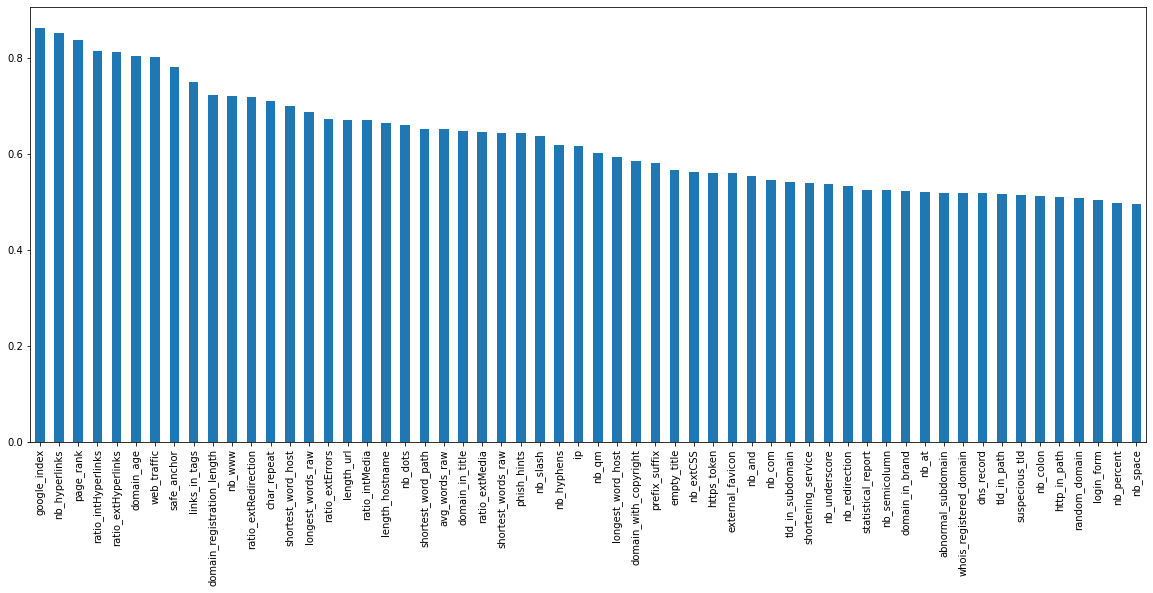

In [ ]:
X_train_univariate, X_test_univariate, y_train_univariate, y_test_univariate = removeUnivariate(X_train_corr, X_test_corr, y_train, y_test)
print(X_train_univariate.shape)
accKnn.append(accuracyKnn(X_train_univariate, X_test_univariate, y_train_univariate, y_test_univariate))
accDecision.append(accuracyDecision(X_train_univariate, X_test_univariate, y_train_univariate, y_test_univariate))
accRF.append(accuracyRF(X_train_univariate, X_test_univariate, y_train_univariate, y_test_univariate))
accNB.append(accuracyNB(X_train_univariate, X_test_univariate, y_train_univariate, y_test_univariate))

In [ ]:
X_train_uni_copy = X_train_univariate.copy()
X_test_uni_copy = X_test_univariate.copy()

Mutual Information

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import minmax_scale

mm_X=minmax_scale(X_train_univariate, feature_range=(0, 1), axis=0, copy=True)
mm_X = pd.DataFrame(mm_X)
mm_X1=minmax_scale(X_test_univariate, feature_range=(0, 1), axis=0, copy=True)
mm_X1 = pd.DataFrame(mm_X1)

sel_ = SelectPercentile(mutual_info_classif, percentile=10).fit(mm_X, y_train_univariate)
features = sel_.get_support()
sel_features = [ f for i,f in enumerate(mm_X.columns) if features[i]]
print(sel_features)
print(len(sel_features))

[34, 35, 36, 51, 52, 54]
6


In [ ]:
mm_X.drop(labels=sel_features, axis=1, inplace=True)
mm_X1.drop(labels=sel_features, axis=1, inplace=True)
print(mm_X.shape)

(8001, 50)


In [ ]:
accKnn.append(accuracyKnn(mm_X, mm_X1, y_train_univariate, y_test_univariate))
accDecision.append(accuracyDecision(mm_X, mm_X1, y_train_univariate, y_test_univariate))
accRF.append(accuracyRF(mm_X, mm_X1, y_train_univariate, y_test_univariate))
accNB.append(accuracyNB(mm_X, mm_X1, y_train_univariate, y_test_univariate))

KNN: 0.8667249927092446
DT: 0.8903470399533392
RF: 0.9372995042286381
NB: 0.7439486730825313


Embedded(Lasso)

In [ ]:
X_train_lasso, X_test_lasso = removeLasso(X_train_uni_copy, X_test_uni_copy, y_train, y_test)
print(X_train_lasso.shape) #reduced to 7
accKnn.append(accuracyKnn(X_train_lasso,X_test_lasso,y_train,y_test))
accDecision.append(accuracyDecision(X_train_lasso,X_test_lasso,y_train,y_test))
accRF.append(accuracyRF(X_train_lasso, X_test_lasso, y_train, y_test))
accNB.append(accuracyNB(X_train_lasso, X_test_lasso, y_train, y_test))

(8001, 7)
KNN: 0.8428113152522602
DT: 0.9238845144356955
RF: 0.9460484106153397
NB: 0.68387284922718


Wrapper

In [ ]:
import joblib
# step forward feature selection
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(RandomForestClassifier(n_jobs=-1),
           k_features=7,
           forward=True,
           floating=False,
           verbose=2,
           scoring='roc_auc',
           cv=3)

sfs = sfs.fit(X_train_lasso, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.9s finished

[2022-04-12 04:11:51] Features: 1/7 -- score: 0.8654787718416243[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.4s finished

[2022-04-12 04:11:59] Features: 2/7 -- score: 0.9455906354511162[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.1s finished

[2022-04-12 04:12:06] Features: 3/7 -- score: 0.9651643888534505[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [ ]:
feat = X_train_lasso.columns[list(sfs.k_feature_idx_)]
print(feat)
X_train_sfs = sfs.transform(X_train_lasso)
X_test_sfs = sfs.transform(X_test_lasso)

Index(['length_hostname', 'nb_www', 'nb_hyperlinks', 'domain_age',
       'web_traffic', 'google_index', 'page_rank'],
      dtype='object')


In [ ]:
accKnn.append(accuracyKnn(X_train_sfs,X_test_sfs,y_train,y_test))
accDecision.append(accuracyDecision(X_train_sfs,X_test_sfs,y_train,y_test))
accRF.append(accuracyRF(X_train_sfs,X_test_sfs, y_train, y_test))
accNB.append(accuracyNB(X_train_sfs,X_test_sfs, y_train, y_test))

KNN: 0.8428113152522602
DT: 0.9238845144356955
RF: 0.9460484106153397
NB: 0.68387284922718


In [ ]:
classifierrf=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifierrf.fit(X_train_sfs,y_train)
y_predrf = classifierrf.predict(X_test_sfs)
accuracy3 = accuracy_score(y_test, y_predrf)
print("RF: {}".format(accuracy3))
y_pred = y_predrf.tolist()
print('{}'.format(y_pred))

RF: 0.9460484106153397
[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1

# Feature Selection #80-20

In [ ]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['url','status'], axis=1),data['status'],test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((9144, 87), (2286, 87))

In [ ]:
y_true = [ y for i,y in enumerate(y_test)] #20-80
print(y_true) #status

[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 

Filteration

In [ ]:
accKnn = [] #20-80
accDecision = []
accRF=[]
accNB= []
accKnn.append(accuracyKnn(X_train,X_test,y_train,y_test))
accDecision.append(accuracyDecision(X_train,X_test,y_train,y_test))
accRF.append(accuracyRF(X_train,X_test,y_train,y_test))
accNB.append(accuracyNB(X_train,X_test,y_train,y_test))
print(X_train.shape)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

KNN: 0.8403324584426947
DT: 0.9396325459317585
RF: 0.9654418197725284
NB: 0.7480314960629921
(9144, 87)


Constant Features

In [ ]:
sel = VarianceThreshold(threshold=0)  #20-80
sel.fit(X_train)  # fit finds the features with zero variance
sum(sel.get_support())

81

In [ ]:
X_train, X_test = removeConstantFeature(X_train,X_test) #20-80
print(X_train.shape)
accKnn.append(accuracyKnn(X_train,X_test,y_train,y_test))
accDecision.append(accuracyDecision(X_train,X_test,y_train,y_test))
accRF.append(accuracyRF(X_train,X_test,y_train,y_test))
accNB.append(accuracyNB(X_train,X_test,y_train,y_test))

(9144, 81)
KNN: 0.8403324584426947
DT: 0.9405074365704287
RF: 0.9663167104111986
NB: 0.7480314960629921


Quasi Constant Features

In [ ]:
sel = VarianceThreshold(
    threshold=0.01)  # 0.01 indicates 99% of observations approximately #20-80

sel.fit(X_train)  # fit finds the features with low variance
sum(sel.get_support())

65

In [ ]:
print(len([x for x in X_train.columns if x not in X_train.columns[sel.get_support()]])) #20-80

16


In [ ]:
varianceAllowed = 0.01      #20-80
X_train_quasi, X_test_quasi = removeQuasiConstant(X_train, X_test, varianceAllowed)
print(X_train_quasi.shape)
accKnn.append(accuracyKnn(X_train_quasi,X_test_quasi,y_train,y_test))
accDecision.append(accuracyDecision(X_train_quasi,X_test_quasi,y_train,y_test))
accRF.append(accuracyRF(X_train_quasi,X_test_quasi,y_train,y_test))
accNB.append(accuracyNB(X_train_quasi,X_test_quasi,y_train,y_test))

(9144, 65)
KNN: 0.8403324584426947
DT: 0.9348206474190727
RF: 0.9566929133858267
NB: 0.7480314960629921


Duplicate Features

In [ ]:
# check for duplicated features in the training set #20-80
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    #if i % 10 == 0:  # this helps me understand how the loop is going
        #print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
print(len(set(duplicated_feat)))

0


Correlation-Spearman

In [ ]:
# build a dataframe with the correlation(Spearman) between features #20-80
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr(method='spearman')
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head(20)

,feature1,feature2,corr
0,nb_subdomains,nb_dots,0.980379
1,nb_dots,nb_subdomains,0.980379
2,longest_word_path,avg_word_path,0.928842
3,avg_word_path,longest_word_path,0.928842
4,nb_qm,nb_eq,0.915042
5,nb_eq,nb_qm,0.915042
6,length_words_raw,length_url,0.907833
7,length_url,length_words_raw,0.907833
8,avg_word_host,longest_word_host,0.877206
9,longest_word_host,avg_word_host,0.877206


In [ ]:
corrmat = X_train.corr(method="pearson")  #20-80
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head(20)

,feature1,feature2,corr
0,longest_words_raw,longest_word_path,0.968467
1,longest_word_path,longest_words_raw,0.968467
2,nb_and,nb_eq,0.894654
3,nb_eq,nb_and,0.894654
4,avg_word_host,longest_word_host,0.813416
5,longest_word_host,avg_word_host,0.813416


In [ ]:
corrmat = X_train.corr(method='kendall')  #20-80
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head(20)

,feature1,feature2,corr
0,nb_subdomains,nb_dots,0.945637
1,nb_dots,nb_subdomains,0.945637
2,nb_qm,nb_eq,0.895010
3,nb_eq,nb_qm,0.895010
4,avg_word_path,longest_word_path,0.806757
5,longest_word_path,avg_word_path,0.806757


In [ ]:
threshold = 0.8 #20-80
X_train_corr, X_test_corr = removeCorelatedFeature(X_train_quasi,X_test_quasi, threshold)
print(X_train_corr.shape)
accKnn.append(accuracyKnn(X_train_corr,X_test_corr,y_train,y_test))
accDecision.append(accuracyDecision(X_train_corr,X_test_corr,y_train,y_test))
accRF.append(accuracyRF(X_train_corr,X_test_corr,y_train,y_test))
accNB.append(accuracyNB(X_train_corr,X_test_corr,y_train,y_test))

(9144, 59)
KNN: 0.8398950131233596
DT: 0.9422572178477691
RF: 0.9615048118985127
NB: 0.7471566054243219


Univariate Features

In [ ]:
# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set   #20-80

roc_values = []
for feature in X_train_corr.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train_corr[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test_corr[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

In [ ]:
# let's add the variable names and order it for clearer visualisation #20-80
roc_values = pd.Series(roc_values)
roc_values.index = X_train_corr.columns
roc_values.sort_values(ascending=False)

google_index                  0.864735
nb_hyperlinks                 0.854282
page_rank                     0.837667
ratio_intHyperlinks           0.822862
ratio_extHyperlinks           0.822612
web_traffic                   0.808588
domain_age                    0.793964
safe_anchor                   0.779705
links_in_tags                 0.746931
ratio_extRedirection          0.734733
domain_registration_length    0.725532
nb_www                        0.717470
char_repeat                   0.712260
shortest_word_host            0.698058
ratio_intMedia                0.690802
ratio_extErrors               0.685275
longest_words_raw             0.684802
length_hostname               0.663846
length_url                    0.661416
nb_dots                       0.661151
ratio_extMedia                0.659868
domain_in_title               0.654170
shortest_word_path            0.650739
avg_words_raw                 0.646265
phish_hints                   0.640352
shortest_words_raw       

(9144, 57)
KNN: 0.8398950131233596
DT: 0.9409448818897638
RF: 0.9575678040244969
NB: 0.7471566054243219


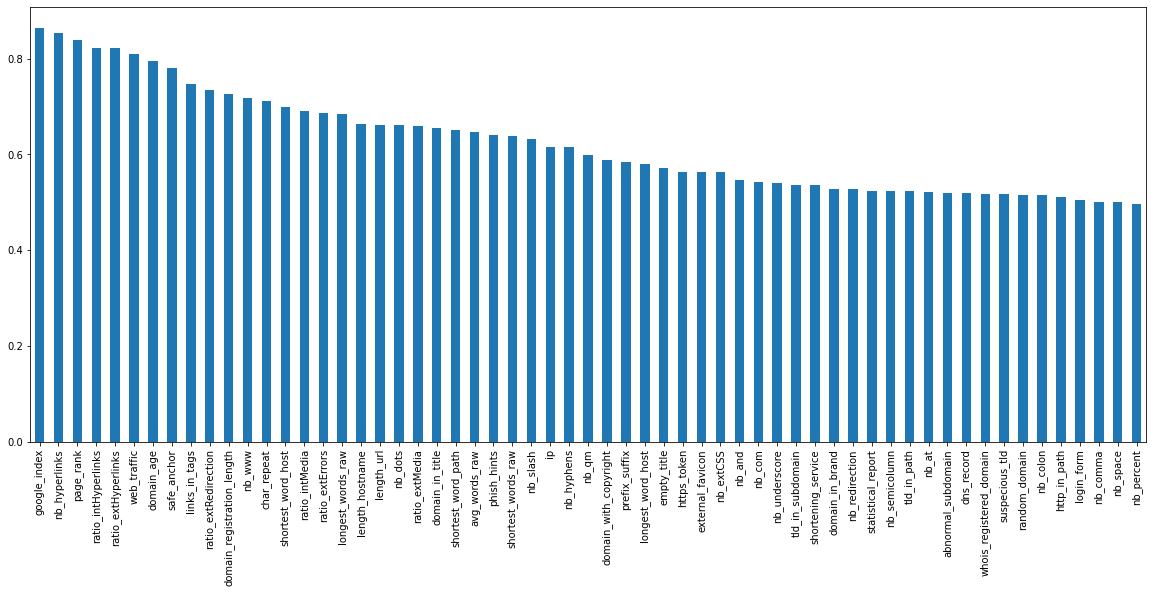

In [ ]:
#20-80
X_train_univariate, X_test_univariate, y_train_univariate, y_test_univariate = removeUnivariate(X_train_corr, X_test_corr, y_train, y_test)
print(X_train_univariate.shape)
accKnn.append(accuracyKnn(X_train_univariate, X_test_univariate, y_train_univariate, y_test_univariate))
accDecision.append(accuracyDecision(X_train_univariate, X_test_univariate, y_train_univariate, y_test_univariate))
accRF.append(accuracyRF(X_train_univariate, X_test_univariate, y_train_univariate, y_test_univariate))
accNB.append(accuracyNB(X_train_univariate, X_test_univariate, y_train_univariate, y_test_univariate))

In [ ]:
#80-20
X_train_uni_copy = X_train_univariate.copy()
X_test_uni_copy = X_test_univariate.copy()

Mutual Information

In [ ]:
#20-80
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import minmax_scale

mm_X=minmax_scale(X_train_univariate, feature_range=(0, 1), axis=0, copy=True)
mm_X = pd.DataFrame(mm_X)
mm_X1=minmax_scale(X_test_univariate, feature_range=(0, 1), axis=0, copy=True)
mm_X1 = pd.DataFrame(mm_X1)

sel_ = SelectPercentile(mutual_info_classif, percentile=10).fit(mm_X, y_train_univariate)
features = sel_.get_support()
sel_features = [ f for i,f in enumerate(mm_X.columns) if features[i]]
print(sel_features)
print(len(sel_features))

[35, 36, 37, 52, 53, 55]
6


In [ ]:
#20-80
mm_X.drop(labels=sel_features, axis=1, inplace=True)
mm_X1.drop(labels=sel_features, axis=1, inplace=True)
print(mm_X.shape)

(9144, 51)


In [ ]:
#20-80
accKnn.append(accuracyKnn(mm_X, mm_X1, y_train_univariate, y_test_univariate))
accDecision.append(accuracyDecision(mm_X, mm_X1, y_train_univariate, y_test_univariate))
accRF.append(accuracyRF(mm_X, mm_X1, y_train_univariate, y_test_univariate))
accNB.append(accuracyNB(mm_X, mm_X1, y_train_univariate, y_test_univariate))

KNN: 0.8740157480314961
DT: 0.8958880139982502
RF: 0.9422572178477691
NB: 0.7506561679790026


Embedded(Lasso)

In [ ]:
#20-80
X_train_lasso, X_test_lasso = removeLasso(X_train_uni_copy, X_test_uni_copy, y_train, y_test)
print(X_train_lasso.shape) #reduced to 7
accKnn.append(accuracyKnn(X_train_lasso,X_test_lasso,y_train,y_test))
accDecision.append(accuracyDecision(X_train_lasso,X_test_lasso,y_train,y_test))
accRF.append(accuracyRF(X_train_lasso, X_test_lasso, y_train, y_test))
accNB.append(accuracyNB(X_train_lasso, X_test_lasso, y_train, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(9144, 7)
KNN: 0.8390201224846894
DT: 0.9308836395450568
RF: 0.94750656167979
NB: 0.6964129483814523


Wrapper

In [ ]:
import joblib
# step forward feature selection
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(RandomForestClassifier(n_jobs=-1),
           k_features=7,
           forward=True,
           floating=False,
           verbose=2,
           scoring='roc_auc',
           cv=3)

sfs = sfs.fit(X_train_lasso, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   12.7s finished

[2022-04-08 11:27:18] Features: 1/7 -- score: 0.8647394828694773[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.8s finished

[2022-04-08 11:27:28] Features: 2/7 -- score: 0.9448210164645908[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s finished

[2022-04-08 11:27:36] Features: 3/7 -- score: 0.9646133289703315[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

# Outlier detection and removal

In [ ]:
X_o = pd.DataFrame(X_train_sfs)
X_o.columns = feat

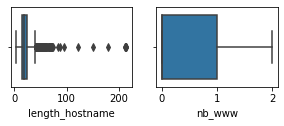

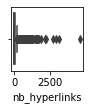

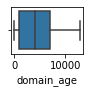

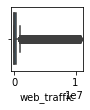

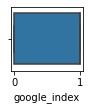

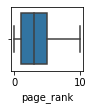

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(3,4,1)
sns.boxplot(X_o['length_hostname'])
plt.subplot(3,4,2)
sns.boxplot(X_o['nb_www'])
plt.show()
plt.subplot(3,4,3)
sns.boxplot(X_o['nb_hyperlinks'])
plt.show()
plt.subplot(4,4,2)
sns.boxplot(X_o['domain_age'])
plt.show()
plt.subplot(3,4,1)
sns.boxplot(X_o['web_traffic'])
plt.show()
plt.subplot(3,4,2)
sns.boxplot(X_o['google_index'])
plt.show()
plt.subplot(3,4,1)
sns.boxplot(X_o['page_rank'])
plt.show()

In [ ]:
z = (np.abs(stats.zscore(X_o)) < 3).all(axis=1)
X_o = X_o[z]
Y_o = y_train[z]

In [ ]:
X_o.shape   #8001 -> 7543 rows

(7543, 7)

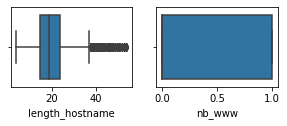

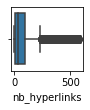

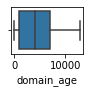

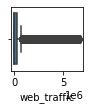

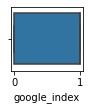

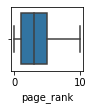

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(3,4,1)
sns.boxplot(X_o['length_hostname'])
plt.subplot(3,4,2)
sns.boxplot(X_o['nb_www'])
plt.show()
plt.subplot(3,4,3)
sns.boxplot(X_o['nb_hyperlinks'])
plt.show()
plt.subplot(4,4,2)
sns.boxplot(X_o['domain_age'])
plt.show()
plt.subplot(3,4,1)
sns.boxplot(X_o['web_traffic'])
plt.show()
plt.subplot(3,4,2)
sns.boxplot(X_o['google_index'])
plt.show()
plt.subplot(3,4,1)
sns.boxplot(X_o['page_rank'])
plt.show()

In [ ]:
classifierrf=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifierrf.fit(X_o,Y_o)
y_predrf = classifierrf.predict(X_test_sfs)
accuracy3 = accuracy_score(y_test, y_predrf)
print("RF: {}".format(accuracy3))
y_pred = y_predrf.tolist()
print('{}'.format(y_pred))

RF: 0.9448818897637795
[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1

In [ ]:
import numpy as np
auc = np.round(roc_auc_score(y_true,y_pred),3)

print('Mean Auc score for our data is {}'.format(auc))

Mean Auc score for our data is 0.945


#Hyperparameter tuning

In [ ]:
model_params = {
    'random_forest' : {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [90,95,100],
            'max_depth': [50,55,58],
            'min_samples_leaf': [ 1,2,8],
            'max_features' : ['auto', 'sqrt'],
            'min_samples_split' : [2, 5, 10],
            'criterion': ['gini','entropy']
        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
scores = []

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  clf.fit(X_train_sfs,y_train)
  scores.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })

In [ ]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])  #70-30
pd.set_option('max_colwidth', 800)
df

,model,best_score,best_params
0,random_forest,0.951131,"{'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 95}"


# Model Evaluation

In [ ]:
classifierrf=RandomForestClassifier(n_estimators=60, criterion='entropy', max_depth=100, random_state=0)
classifierrf.fit(X_train_sfs,y_train)
y_predrf = classifierrf.predict(X_test_sfs)
accuracy3 = accuracy_score(y_test, y_predrf)
print("RF: {}".format(accuracy3))
y_pred = y_predrf.tolist()
print('{}'.format(y_pred))

RF: 0.9518810148731408
[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1

In [ ]:
import numpy as np
auc = np.round(roc_auc_score(y_true,y_pred),3)

print('Mean Auc score for our data is {}'.format(auc))

Mean Auc score for our data is 0.952


# Prediction

In [ ]:
y_predrf = classifierrf.predict([[23,1,0,2935,0,1,0]])
print("The website status is {}".format(y_predrf))

The website status is [0]


In [ ]:
y_predrf = classifierrf.predict([[0,1,125,8301,99386,0,4]])
print("The website status is {}".format(y_predrf))

The website status is [1]


# Inferences

In [ ]:
from IPython.display import display

dict= {'Type':['Raw data','Filter based(basic)', 'Filter based (correlated)', 'Statistical','Filter-Based','Embedded','Wrapper'],

        'Steps' : ['None','Remove Constant, Quasi Constant & Duplicated Features', 'Remove Correlated features (Spearman)','Univariate','Mutual Information','Lasso','SFS'],

        'KNN' : [83.87,83.87,83.84,83.84,86.67,84.28,84.28],
        'DT'    :[93.64,93.58,93.52,93.67,89.03,92.38,92.38],
        'RF'    :[96.00,95.71,95.77,95.36,93.72,94.60,94.60],
        'NB'   :[74.94,74.94,74.65,74.62,74.39,68.38,68.38],
        'No. of Features': [87,64,58,56,50,7,7]}

df = pd.DataFrame(dict)
display(df)

,Type,Steps,KNN,DT,RF,NB,No. of Features
0,Raw data,None,83.87,93.64,96.00,74.94,87
1,Filter based(basic),"Remove Constant, Quasi Constant & Duplicated F...",83.87,93.58,95.71,74.94,64
2,Filter based (correlated),Remove Correlated features (Spearman),83.84,93.52,95.77,74.65,58
3,Statistical,Univariate,83.84,93.67,95.36,74.62,56
4,Filter-Based,Mutual Information,86.67,89.03,93.72,74.39,50
5,Embedded,Lasso,84.28,92.38,94.60,68.38,7
6,Wrapper,SFS,84.28,92.38,94.60,68.38,7


In [ ]:
#80-20
from IPython.display import display

dict= {'Type':['Raw data','Filter based(basic)', 'Filter based (correlated)', 'Statistical','Filter-Based','Embedded'],

        'Steps' : ['None','Remove Constant, Quasi Constant & Duplicated Features', 'Remove Correlated features (Spearman)','Univariate','Mutual Information','Lasso'],

        'KNN' : [84.03,84.03,83.98,83.98,87.40,83.90],
        'DT'    :[93.96,93.48,94.22,94.09,89.58,93.08],
        'RF'    :[96.54,95.66,96.15,95.75,94.22,94.75],
        'NB'   :[74.80,74.80,74.71,74.71,75.06,69.64],
        'No. of Features': [87,65,59,57,51,7]}

df = pd.DataFrame(dict)
display(df)

,Type,Steps,KNN,DT,RF,NB,No. of Features
0,Raw data,None,84.03,93.96,96.54,74.80,87
1,Filter based(basic),"Remove Constant, Quasi Constant & Duplicated F...",84.03,93.48,95.66,74.80,65
2,Filter based (correlated),Remove Correlated features (Spearman),83.98,94.22,96.15,74.71,59
3,Statistical,Univariate,83.98,94.09,95.75,74.71,57
4,Filter-Based,Mutual Information,87.40,89.58,94.22,75.06,51
5,Embedded,Lasso,83.90,93.08,94.75,69.64,7


In [ ]:
#Final Inferences
from IPython.display import display

dict= {'Type':['Raw Data', 'Feature Selection','Outlier elimination', 'Hyperparameter Tuning'],

        'KNN' : [84.87,84.28,'-','-'],
        'DT'    :[93.64,92.38,'-','-'],
        'RF'    :[96.00,94.60,94.48,95.18],
        'NB'   :[74.94,68.38,'-','-'],
        'No. of Features': [87,7,7,7]}

df = pd.DataFrame(dict)
display(df)


,Type,KNN,DT,RF,NB,No. of Features
0,Raw Data,84.87,93.64,96.00,74.94,87
1,Feature Selection,84.28,92.38,94.60,68.38,7
2,Outlier elimination,-,-,94.48,-,7
3,Hyperparameter Tuning,-,-,95.18,-,7


# Pickling

In [ ]:
# saving the model
import pickle
pickle_out = open("classifier.pkl", mode = "wb")
pickle.dump(classifierrf, pickle_out)
pickle_out.close()